In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import APLII_Functions as AC
from astropy.wcs import WCS

In [65]:
fit = fits.open("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Contrastive_Learning_JWST\\Databases\\fresco-gn_imgv7.3_photcatv1_swlw_fo_det_aper8_zphot.cat.fits")

In [84]:
f = open("C:\\Users\\casey\\UnigeMasters\\Astrophysics_Lab_Contrastive_Learning_JWST\\Databases\\FRESCO_O3_emitters_release_v2.txt")
print(f.read())

#################
# FRESCO OIII emitter catalogue v1
# name: GOODS fields identifier (GN/GS) and ID from the FRESCO grizli data reduction v7.3 
# ra, dec: coordinates of the source in the F210M+F444W image from the FRESCO grizli data reduction v7.3 (also see further Weibel+2024)
# q_mean : Visual inspection quality flag, averaged to half-integer over 4 inspections
# z : redshift of the OIII emitter
# flux_*, err_* : grizli best-fit line flux and error using a fixed redshift in cgi units [erg/s/cm**2]
# muv, muv_err_84, muv_err_16: rest-frame UV magnitude [AB] and 16-84 percentiles error from the best-fit Prospector model (see Naidu+, in prep.)
# f_f444w, e_f444w: F444W flux and error in nJy from the FRESCO grizli data reduction v7.3. PSF-matched, aperture-corrected fluxes and errors with 5% error floor (also see further Weibel+2024 for details on the imaging data reduction)
# mag_det_img : magnitude in the detection image (F210+F444W), necessary for completeness correction
############

In [90]:
header = fit[1].header
display(header)
# print(len(header))
imx = fit[1].data['x_image']
imy = fit[1].data['y_image']


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1616 / length of dimension 1                          
NAXIS2  =                33539 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  202 / number of table fields                         
TTYPE1  = 'id      '                                                            
TFORM1  = 'K       '                                                            
TTYPE2  = 'id_grizli'                                                           
TFORM2  = 'K       '                                                            
TTYPE3  = 'ra      '        

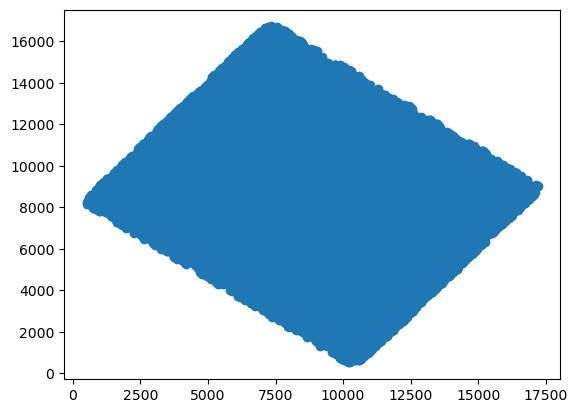

In [91]:
plt.scatter(imx,imy)

In [44]:
import glob
import re

def get_fresco_ids(folder_path):
    '''
    Scrapes all fresco FITS file IDs from the given folder.
    Returns a list of ID strings (e.g. ['00169', '00173', ...])
    '''
    files = glob.glob(folder_path + "\\fresco-only-n-v2_*.stack.fits")
    
    ids = []
    for file in files:
        match = re.search(r'fresco-only-n-v2_(\d+)\.stack\.fits', file)
        if match:
            ids.append(match.group(1))
    
    return ids

In [58]:
folder = "C:\\Users\\casey\\Desktop\\2dspec"
fresco_ids = get_fresco_ids(folder)

print(fresco_ids)

all_fits = []
all_img = []
for ii in range(len(fresco_ids)):
    fit = AC.fits_data_loader(fresco_ids[ii])
    img = fit[1].data
    all_fits.append(fit)
    all_img.append(img)
print(len(all_img))

['00169', '00173', '00560', '00617', '00620', '00683', '00828', '00849', '00857', '00990', '01001', '01051', '01078', '01092', '01128', '01129', '01150', '01160', '01200', '01244', '01245', '01297', '01367', '01491', '01596', '01612', '01652', '01688', '01693', '01695', '01843', '01994', '02203', '02204', '02607', '02612', '02654', '02689', '02906', '02916', '02932', '02999', '03200', '03317', '03340', '03617', '03666', '03775', '03885', '03930', '04153', '04191', '04286', '04324', '04367', '04460', '04594', '04661', '04699', '04727', '04856', '05004', '05147', '05205', '05233', '05264', '05359', '05365', '05412', '05500', '05569', '05620', '05639', '05812', '05842', '05980', '06129', '06172', '06173', '06178', '06218', '06273', '06293', '06488', '06537', '06575', '06587', '06688', '06753', '06759', '06857', '06867', '06954', '07041', '07062', '07111', '07140', '07196', '07219', '07286', '07291', '07322', '07411', '07431', '07436', '07527', '07982', '08029', '08184', '08328', '08387', 

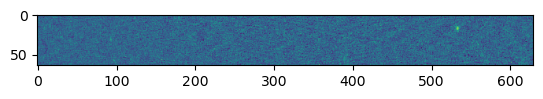

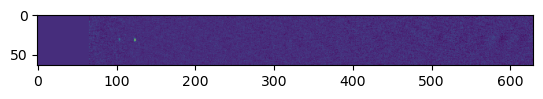

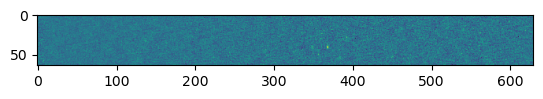

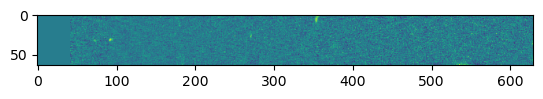

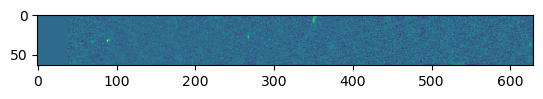

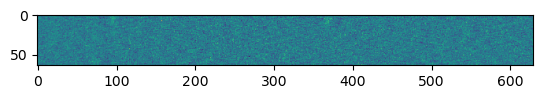

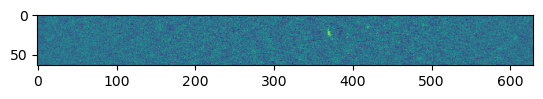

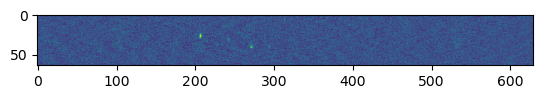

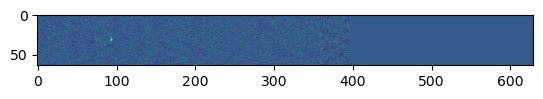

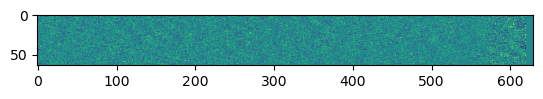

In [57]:
for ii in range(10):
    plt.imshow(all_img[ii])
    plt.show()

In [ ]:
# Use weighted sum (gaussian) on spectra to extract a good looking spectra

In [ ]:
# 